In [166]:
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
loc_encoding = {
    "Чиланзарский район"      :0,
    "Мирзо-Улугбекский район" :1, 
    "Юнусабадский район"      :1,
    "Яккасарайский район"     :2, 
    "Мирабадский район"       :2,
    "Шайхантахурский район"   :2,
    "Яшнабадский район"       :1,          
    "Сергелийский район "     :0,       
    "Алмазарский район"       :1, 
    "Учтепинский район"       :0,           
    "Бектемирский район"      :0           
}

In [96]:
data = pd.read_csv("Data/new_olx_home.csv")
data

,Location,Prices,Xususiy biznes,Turar joyi,Xonalar,Umumiy maydoni,Etaj,Max etaj,Mebel,Televizor,Shifoxona,Bolalar bogchasi,Kongilochar joy,Yashil maydon,Avtoturargoh,Maktab,HovliDom
0,2,142000.0,Бизнес,Новостройки,3,92.0,4,8,1,1,1,1,1,1,1,1,0
1,2,127000.0,Бизнес,Новостройки,3,110.0,3,8,0,0,1,1,1,1,1,1,0
2,0,46000.0,Бизнес,Вторичный рынок,2,45.0,1,4,1,1,1,1,1,1,1,1,0
3,2,240000.0,Бизнес,Новостройки,4,150.0,3,8,1,1,1,1,1,1,1,1,0
4,1,35001.0,Бизнес,Вторичный рынок,1,39.0,4,5,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,0,65000.0,Бизнес,Вторичный рынок,3,64.0,1,4,1,1,0,0,0,0,0,0,0
5093,0,56000.0,Бизнес,Новостройки,2,48.0,1,6,0,0,0,0,0,0,0,0,0
5094,0,46997.0,Бизнес,Вторичный рынок,2,52.0,2,4,1,0,0,0,0,0,0,0,0
5095,0,34455.0,Бизнес,Вторичный рынок,1,30.0,2,4,0,0,0,0,0,0,0,0,0


In [97]:
Y = data['Prices'].to_numpy()
Y

array([142000., 127000.,  46000., ...,  46997.,  34455.,  65000.])

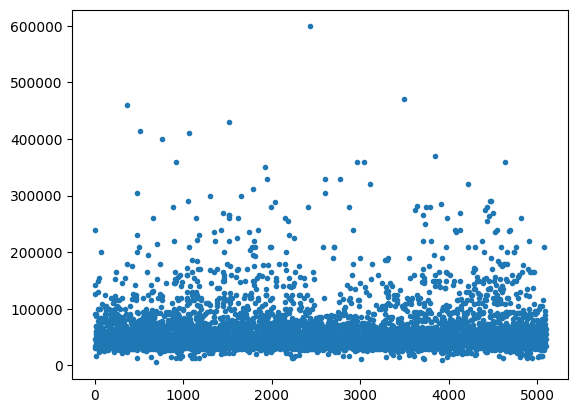

In [98]:
plt.plot(Y, '.')
plt.show()

In [119]:
Y = Y.reshape(-1,1)
Y

array([[142000.],
       [127000.],
       [ 46000.],
       ...,
       [ 46997.],
       [ 34455.],
       [ 65000.]])

In [99]:
X = data.drop('Prices', axis=1).to_numpy().T
X

array([[2, 2, 0, ..., 0, 0, 2],
       ['Бизнес', 'Бизнес', 'Бизнес', ..., 'Бизнес', 'Бизнес', 'Бизнес'],
       ['Новостройки', 'Новостройки', 'Вторичный рынок', ...,
        'Вторичный рынок', 'Вторичный рынок', 'Вторичный рынок'],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

# Encoding xususiy biznes

In [100]:
label_xususiy_biznes = LabelEncoder()

In [101]:
label_xususiy_biznes.fit(X[1])

LabelEncoder()

In [102]:
label_xususiy_biznes.classes_

array(['Бизнес', 'Частное лицо'], dtype=object)

In [103]:
X[1] = label_xususiy_biznes.transform(X[1])

In [104]:
X[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [105]:
label_turar_joy = LabelEncoder()

In [106]:
X[2]

array(['Новостройки', 'Новостройки', 'Вторичный рынок', ...,
       'Вторичный рынок', 'Вторичный рынок', 'Вторичный рынок'],
      dtype=object)

# Encoding Turar joy

In [107]:
label_turar_joy.fit(X[2])

LabelEncoder()

In [108]:
label_turar_joy.classes_

array(['Вторичный рынок', 'Новостройки'], dtype=object)

In [109]:
X[2] = label_turar_joy.transform(X[2])
X[2]

array([1, 1, 0, ..., 0, 0, 0], dtype=object)

# Fit model

In [120]:
from sklearn.linear_model import LinearRegression

In [156]:
X

array([[2, 2, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [157]:
X = X.T
X

array([[2, 0, 1, ..., 1, 1, 0],
       [2, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 1, 1, 0]], dtype=object)

In [135]:
Y_MinMaxScaler = MinMaxScaler()

In [136]:
mm_y = Y_MinMaxScaler.fit_transform(Y)
mm_y

array([[0.2303806 ],
       [0.20511957],
       [0.06871   ],
       ...,
       [0.07038902],
       [0.04926743],
       [0.10070731]])

In [148]:
Y_MinMaxScaler.scale_

array([1.68406871e-06])

In [149]:
Y_MinMaxScaler.min_

array([-0.00875716])

In [152]:
Y_MinMaxScaler.data_max_

array([599000.])

In [153]:
Y_MinMaxScaler.data_max_

array([599000.])

In [154]:
Y_MinMaxScaler.data_range_

array([593800.])

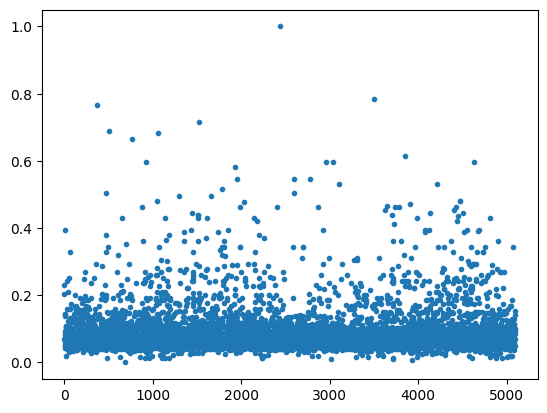

In [137]:
plt.plot(mm_y, '.')
plt.show()

In [188]:
 X_train, X_test, y_train, y_test = train_test_split(X, mm_y, test_size=0.2, random_state=1)

# Linear Regression model

In [189]:
linear_model = LinearRegression()

In [190]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [191]:
linear_model.coef_

array([[ 0.01287964, -0.01132334,  0.0323963 ,  0.00114492,  0.0012936 ,
        -0.00324509,  0.00163788,  0.01964621,  0.01133641,  0.00482453,
        -0.00755484, -0.00304442,  0.01400401, -0.00456664, -0.00824598,
        -0.03412562]])

In [192]:
def metrcis(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"r2 score : {r2}\nMAE : {mae}\nMSE : {mse}")

In [193]:
y_pred = linear_model.predict(X_test)

In [197]:
metrcis(Y_MinMaxScaler.inverse_transform(y_test), Y_MinMaxScaler.inverse_transform(y_pred))

r2 score : 0.4961907215400515
MAE : 15011.452923177245
MSE : 805828842.396747


# SGD model

In [198]:
from sklearn.linear_model import SGDRegressor

In [199]:
sgd_model = SGDRegressor()

In [200]:
sgd_model.fit(X_train, y_train)

/home/ai/Projects/AI/ai_full/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [201]:
y_pred = linear_model.predict(X_test)

In [203]:
metrcis(Y_MinMaxScaler.inverse_transform(y_test), Y_MinMaxScaler.inverse_transform(y_pred))

r2 score : 0.4961907215400515
MAE : 15011.452923177245
MSE : 805828842.396747


In [204]:
sgd_model.coef_

array([ 4.19159865e+09,  4.36563179e+09, -1.52401126e+10,  1.28282745e+10,
       -3.19988657e+08, -5.48640691e+09,  3.24262297e+08,  3.10279629e+09,
       -5.01367833e+09,  8.38681701e+09,  2.27719238e+10, -2.47316776e+09,
       -3.24957081e+09,  5.41627691e+09, -9.32862031e+09,  9.97305443e+09])